In [1]:
import torch
from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np
import torch.nn.functional as F

In [ ]:
# 搬运：https://jaketae.github.io/study/pytorch-inception/
# 个人看了一圈觉得他的代码最简洁易懂

class ConvBlock(torch.nn.Module):
    def __init__(self, in_channels, out_chanels, **kwargs):
        super(ConvBlock, self).__init__()
        self.conv = torch.nn.Conv2d(in_channels, out_chanels, **kwargs)
        self.bn = torch.nn.BatchNorm2d(out_chanels)
        
    def forward(self, x):
        return F.relu(self.bn(self.conv(x)))


# inception模块
class InceptionBlock(torch.nn.Module):
    def __init__(
        self, 
        in_channels, 
        out_1x1,
        red_3x3,
        out_3x3,
        red_5x5,
        out_5x5,
        out_pool,
    ):
        super(InceptionBlock, self).__init__()
        # 1*1卷积
        self.branch1 = ConvBlock(in_channels, out_1x1, kernel_size=1)

        # 3*3卷积
        self.branch2 = torch.nn.Sequential(
            ConvBlock(in_channels, red_3x3, kernel_size=1, padding=0),
            ConvBlock(red_3x3, out_3x3, kernel_size=3, padding=1),
        )

        # 5*5卷积
        self.branch3 = torch.nn.Sequential(
            ConvBlock(in_channels, red_5x5, kernel_size=1),
            ConvBlock(red_5x5, out_5x5, kernel_size=5, padding=2),
        )

        # pooling
        self.branch4 = torch.nn.Sequential(
            torch.nn.MaxPool2d(kernel_size=3, padding=1, stride=1),
            ConvBlock(in_channels, out_pool, kernel_size=1),
        )
    
    def forward(self, x):
        branches = (self.branch1, self.branch2, self.branch3, self.branch4)

        # 堆叠的方式就是“拼接”一下
        return torch.cat([branch(x) for branch in branches], 1)

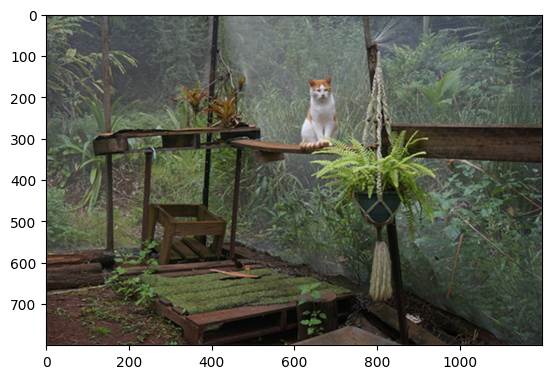

torch.Size([1, 800, 1200, 3])


In [2]:
img = cv.imread("9.jpg")
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()


img_rgb = np.array(img_rgb)
x = torch.from_numpy(img_rgb).float().unsqueeze(dim=0)

# 别忘了看tensor形状！！！
print(x.shape)

torch.Size([1, 199, 299, 1])


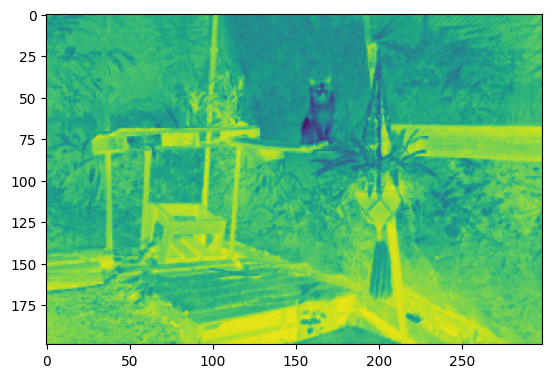

In [3]:
# 先平等的卷一次
conv = torch.nn.Conv3d(in_channels=1,out_channels=1,
                           kernel_size=(7,7,3),
                           stride=4,
                           padding='valid')

x = conv(x)
print(x.shape)

plt.imshow(x.detach().numpy().squeeze())
plt.show()

torch.Size([1, 97, 147, 1])
torch.Size([1, 90, 140, 1])


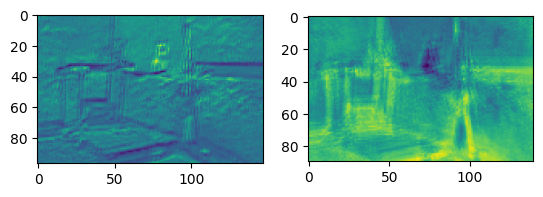

In [4]:
big_conv = torch.nn.Conv3d(in_channels=1,out_channels=1,
                           kernel_size=(7,7,1),
                           stride=2,
                           padding='valid')

x_big = big_conv(x)
print(x_big.shape)
small_conv = torch.nn.Conv3d(in_channels=1,out_channels=1,
                           kernel_size=(21,21,1),
                           stride=2,
                           padding='valid')

x_small = small_conv(x)
print(x_small.shape)

fig, axes = plt.subplots(1, 2)
axes[0].imshow(x_big.detach().numpy().squeeze())
axes[1].imshow(x_small.detach().numpy().squeeze())
plt.show()

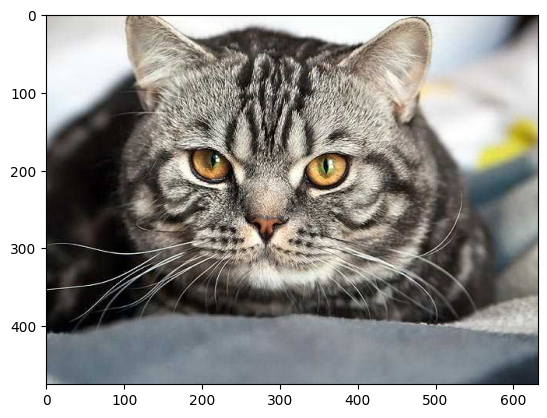

torch.Size([1, 475, 632, 3])


In [5]:
img_b = cv.imread("10.jpg")
img_rgb_b = cv.cvtColor(img_b, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb_b)
plt.show()


img_rgb_b = np.array(img_rgb_b)
x_b = torch.from_numpy(img_rgb_b).float().unsqueeze(dim=0)

# 别忘了看tensor形状！！！
print(x_b.shape)

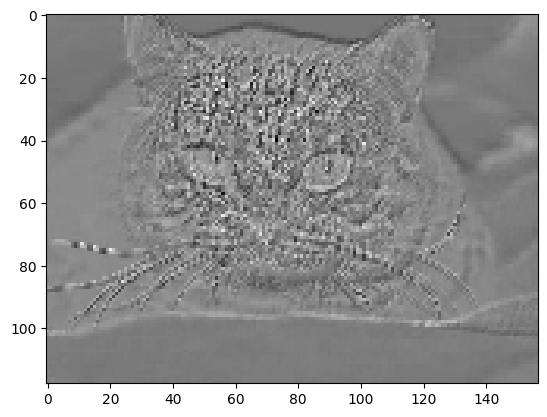

In [6]:
# 先平等的卷一次
conv = torch.nn.Conv3d(in_channels=1,out_channels=1,
                           kernel_size=(7,7,3),
                           stride=4,
                           padding='valid')

x_b = conv(x_b)

plt.imshow(x_b.detach().numpy().squeeze(), cmap='gray')
plt.show()

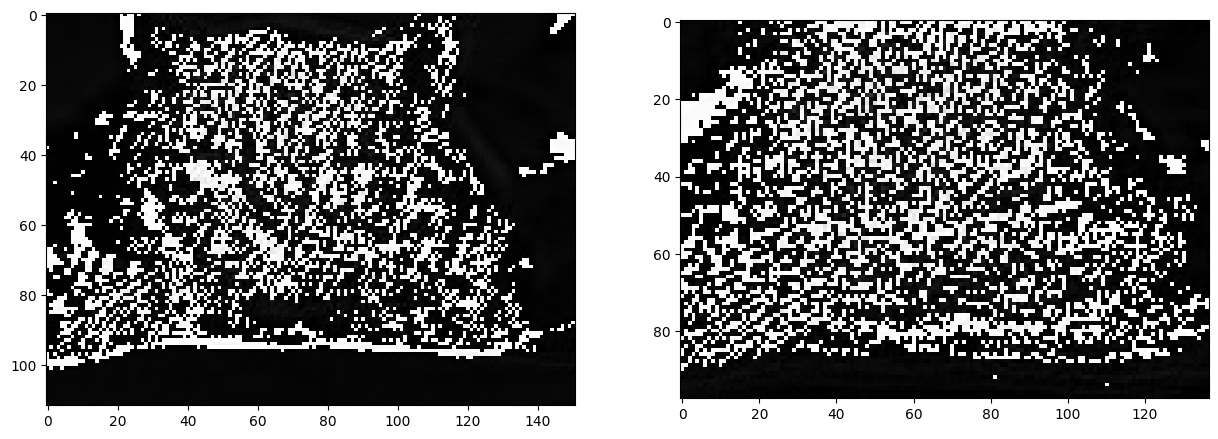

In [7]:
big_conv = torch.nn.Conv3d(in_channels=1,out_channels=1,
                           kernel_size=(7,7,1),
                           stride=1,
                           padding='valid')

x_big_b = big_conv(x_b)

small_conv = torch.nn.Conv3d(in_channels=1,out_channels=1,
                           kernel_size=(21,21,1),
                           stride=1,
                           padding='valid')

x_small_b = small_conv(x_b)

fig, axes = plt.subplots(1, 2, figsize=(15, 15))
axes[0].imshow(x_big_b.detach().numpy().squeeze().astype('uint8'), cmap='gray')
axes[1].imshow(x_small_b.detach().numpy().squeeze().astype('uint8'),  cmap='gray')
plt.show()